# Problem to be solved: create a Machine Learning model to predict the occurrence of diseases

Data source: National Institute of Diabetes and Digestive and Kidney Diseases

Competition page: https://www.kaggle.com/c/competicao-dsa-machine-learning-jan-2019/

# Exploratory Data Analysis 

Data fields:
* num_gestacoes - Number of times pregnant
* glicose - Plasma glucose concentration in oral glucose tolerance test
* pressao_sanguinea - Diastolic blood pressure in mm Hg
* grossura_pele - Thickness of the triceps skin fold in mm
* insulina - Insulin (mu U / ml)
* bmi - Body mass index measured by weight in kg / (height in m) ^ 2
* indice_historico - Diabetes History Index (Pedigree Function)
* idade - Age in years
* classe - Class (0 - did not develop disease / 1 - developed disease)

## Loading the data

In [29]:
# Importing packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
data = pd.read_csv('data/dataset_treino.csv')
data.head(5)

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


## Data overview

In [30]:
# General statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
id                   600 non-null int64
num_gestacoes        600 non-null int64
glicose              600 non-null int64
pressao_sanguinea    600 non-null int64
grossura_pele        600 non-null int64
insulina             600 non-null int64
bmi                  600 non-null float64
indice_historico     600 non-null float64
idade                600 non-null int64
classe               600 non-null int64
dtypes: float64(2), int64(8)
memory usage: 47.0 KB


All 10 predictors variables are quantitative (numerical) and we have 600 observations to build the prediction model.

The only qualitative column is the labels, where:

* 0 - do not have the disease
* 1 - have the disease


## Data Cleaning

### Checking if there is missing values

In [63]:
# If the result is False, there is no missing value
data.isnull().values.any()

False

### Computing statistics for each column

In [32]:
data.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,3.820000,120.135000,68.681667,20.558333,79.528333,31.905333,0.481063,33.278333,0.346667
std,173.349358,3.362009,32.658246,19.360226,16.004588,116.490583,8.009638,0.337284,11.822315,0.476306
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.075000,0.248000,24.000000,0.000000
50%,300.500000,3.000000,116.000000,70.000000,23.000000,36.500000,32.000000,0.384000,29.000000,0.000000
75%,450.250000,6.000000,140.000000,80.000000,32.000000,122.750000,36.525000,0.647000,40.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the table above, we can see the zero values in almost all columns. But for some columns (e.g. *glicose*) we cannot have a zero value. So we need to treat these values.

After read some papers about the variables in the dataset, I see that some columns can have a value very close to zero (e.g. *grossura_pele*), but others can't have a zero value. 

The columns that can not hae 
* glicose
* pressao_sanguinea
* bmi

Let's see the number of the ocurrences of zero values for each of the columns:


In [33]:
# Compute the number of occurrences of a zero value 
for c in ['glicose', 'pressao_sanguinea', 'bmi']:
    counter = len(data[data[c] == 0])    
    print('{} - {}'.format(c, counter))    

glicose - 5
pressao_sanguinea - 28
bmi - 9


Let's remove these observations of our data.

In [34]:
# Removing observations with zero value
for c in ['glicose', 'pressao_sanguinea', 'bmi']:
    data = data[data[c] != 0]

data.shape

(564, 10)

The final number of observations was 564. 

Let's see the compute some statistics again:

In [35]:
data.describe()

,id,num_gestacoes,glicose,pressao_sanguinea,grossura_pele,insulina,bmi,indice_historico,idade,classe
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,300.664894,3.845745,121.354610,72.049645,21.432624,84.406028,32.367199,0.483294,33.448582,0.340426
std,173.410435,3.349287,31.130992,12.261552,15.809953,118.432015,6.974710,0.337668,11.868844,0.474273
min,1.000000,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,150.750000,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.250500,24.000000,0.000000
50%,298.500000,3.000000,116.000000,72.000000,23.500000,49.000000,32.000000,0.389000,29.000000,0.000000
75%,450.250000,6.000000,141.250000,80.000000,33.000000,130.000000,36.600000,0.648250,41.000000,1.000000
max,600.000000,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking outliers

Let's check if there is ouliers in the data.

First, we'll use a set of boxplots, one for each column.

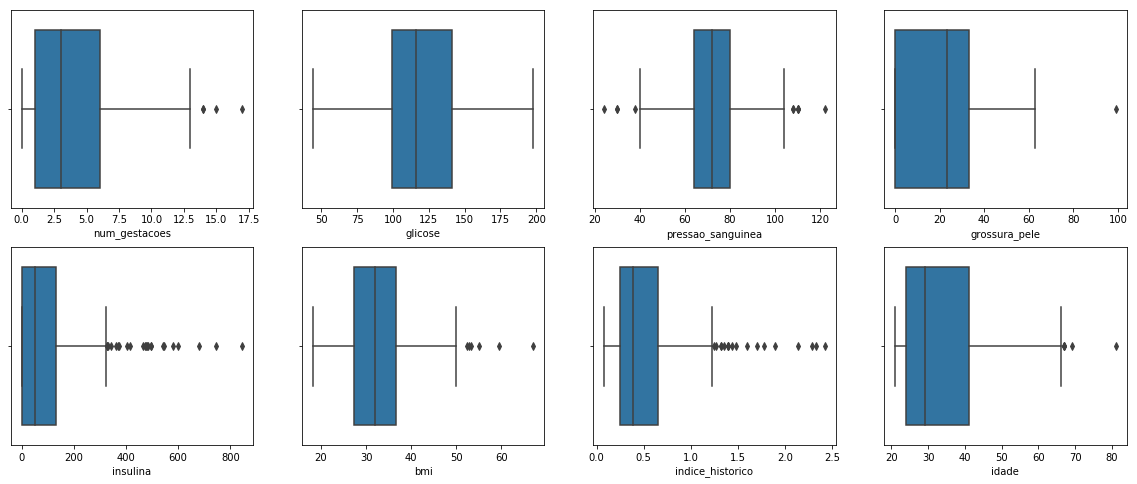

In [66]:
#sns.boxplot(data=data, orient="h", palette="Set2")
fig, axes = plt.subplots(2,4, figsize=(20,8))

x,y = 0,0
for i, column in enumerate(data.columns[1:-1]):    
    sns.boxplot(x=data[column], ax=axes[x,y])
    if i < 3:
        y += 1
    elif i == 3: 
        x = 1
        y = 0
    else:
        y += 1

We can see some possible outliers for almost all columns, except *glicose* column.

Let's do another analisys using the ....
https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba



### Checking the balance of the dataset

Let's checking the distribuitions of examples for each label:

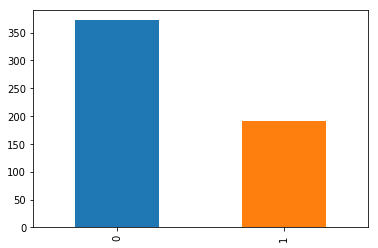

In [37]:
data.classe.value_counts().plot(kind='bar');

In [38]:
data.classe.value_counts(normalize=True)

0    0.659574
1    0.340426
Name: classe, dtype: float64

From the figure above, we see most of our examples are of people that do not have the diasese. More specically, 66% of the data are for health people.
Despite the dataset is unabalanced, as we have a low number of samples, I prefer do not change anything at this moment.


# To do list:
* Check the zero values in INSULINA e GROSSURA_PELE
